### VD B.1:

In [128]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data by adding a column of 1s (x_0 = 1)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

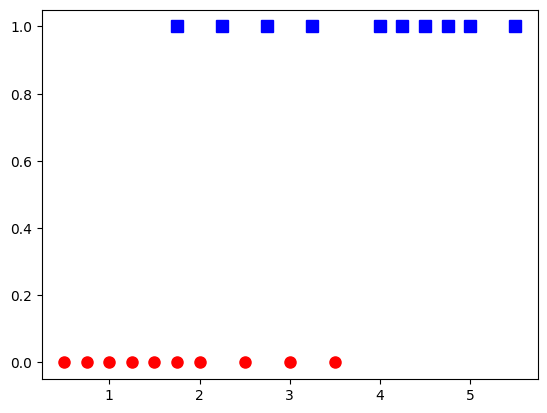

In [135]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
plt.show()

In [139]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    # loop of stochastic gradient descent
    while count < max_count:
        # shuffle the order of data (for stochastic gradient descent).
        # and put into mix_id
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [140]:
eta = .05
d = X.shape[0]
np.random.seed(1)
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.14756984]
 [ 1.4545261 ]]


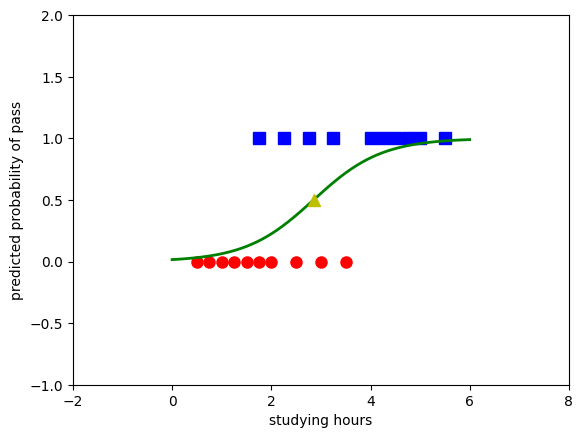

In [142]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

In [144]:
# Hãy thực hiện lệnh để thu được bộ hệ số, quan sát kết quả chạy và dùng bộ hệ số thu được để chạy dự đoán cho kết
# quả thi của các sinh viên với số giờ học sau
X_test = np.array([2.45, 1.85, 3.75, 3.21, 4.05])
probs = sigmoid(w0 + w1 * X_test)
y_pred = [1 if logit >= 0.5 else 0 for logit in probs]
y_pred

[0, 0, 1, 1, 1]

- Kết quả của KNN là: 
  - k=3: [1. 0. 1. 0. 1.]
  - k=4: [1. 0. 1. 1. 1.]
  - k=5: [0. 0. 1. 0. 1.]

### VD B.2:

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
# generate list of data points
np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


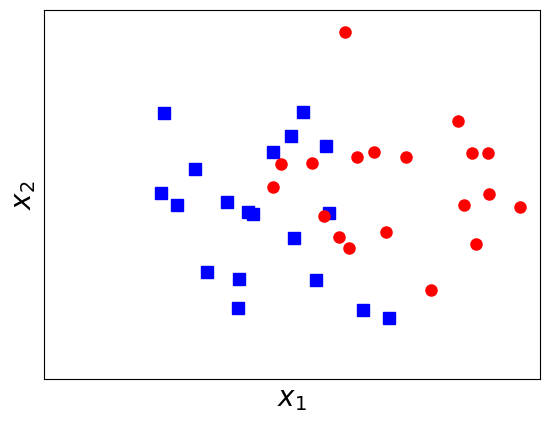

In [146]:
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
# save the figure to an image first
plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
plt.show()

In [147]:
def sigmoid(s):
    return 1/(1 + np.exp(-s)) # calculate sigmoid function
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data for stochastic gradient descent method
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [149]:
X = np.concatenate((X1, X2), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
eta = 0.05
d = X.shape[0]
w_init = np.random.randn(d, 1) # initialize parameters w = w_init
# call logistic_sigmoid_regression procedure
w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)
# print out the parameter
print(w[-1])

[[-9.40520562]
 [ 2.18391091]
 [ 1.392856  ]]


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


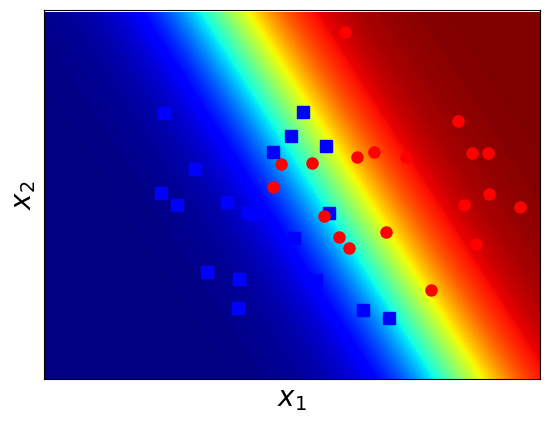

In [152]:
# Make data.
x1m = np.arange(-1, 6, 0.025) # generate data coord. X1
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025) # generate data coord. X2
x2en = len(x2m)
x1m, x2m = np.meshgrid(x1m, x2m) # create mesh grid X = (X1, X2)
# now assign the parameter w0, w1, w2 from array w which was computed above
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
# calculate probability zm=P(c|x)=sigmoid(w^Tx)=sigmoid(w0+w1*x1m+w2*x2m)
zm = sigmoid(w0 + w1*x1m + w2*x2m)
X0 = X[:, np.where(y == 0)[0]]
X1 = X[:, np.where(y == 1)[0]]
# plot contour of prob. zm by the saturation of blue and red
# more red <=> prob. that data point belong to red class is higher & vise versa
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')
# finally, plot the data and take a look
plt.plot(X0[1, :], X0[2, :], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[1, :], X1[2, :], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
plt.show()

### VD B.3:

#### a. Phân loại bằng phương pháp hồi quy Logistic

In [169]:
import pandas as pd

data = pd.read_csv('Admission_Predict.csv')
data['Label'] = np.where(data['Chance of Admit'] >= 0.75, 1, 0)
data.drop(['Serial No.', 'Chance of Admit'], inplace=True, axis=1)
names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'Label']
data.columns = names
data.head()

,X1,X2,X3,X4,X5,X6,X7,Label
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


Train test split:

In [170]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
Xbar = X.copy()
Xbar.insert(0, 'X0', np.ones(len(Xbar)))

X_train, y_train = Xbar[:350].to_numpy(), y[:350].to_numpy()
X_test, y_test = Xbar[350:].to_numpy(), y[350:].to_numpy()

Fit model:

In [181]:
from sklearn.linear_model import LogisticRegression

np.random.seed(1)
log_reg = LogisticRegression(max_iter=10000).fit(X_train, y_train)

In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

probs = log_reg.predict(X_test)
y_pred = np.zeros(len(X_test))
y_pred[probs >= 0.5] = 1
y_pred

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy: 0.9
Precision: 0.9473684210526315
Recall: 0.8181818181818182


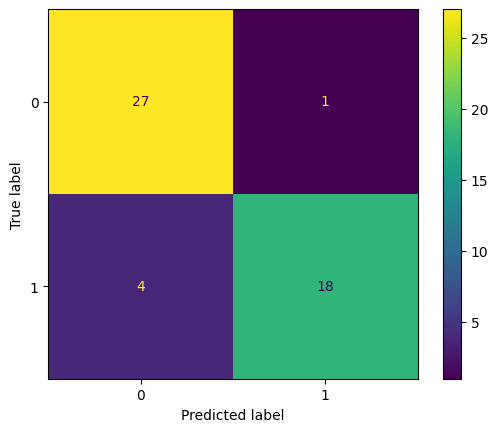

In [185]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#### b. Bài tập thực hành: Dự đoán khả năng bằng hồi quy tuyến tính

In [186]:
import pandas as pd

data = pd.read_csv('Admission_Predict.csv')
data.drop(['Serial No.'], inplace=True, axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Train test split:

In [197]:
X_train, y_train = data.iloc[:350, :-1], data.iloc[:350, -1]
X_test, y_test = data.iloc[350:, :-1], data.iloc[350:, -1]

Fit model:

In [194]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, y_train)

LinearRegression()

Evaluate:

In [195]:

y_pred = lin_reg.predict(X_test)
mse = np.mean((y_test - y_pred)**2)
print(f'MSE: {mse}')

MSE: 0.004641678440367148


#### c. Bài tập tự thực hành: Hãy sử dụng phương pháp Naïve Bayes phù hợp để phân loại dữ liệu nói trên. Tìm hiểu và sử dụng hàm đo thời gian để tính

In [240]:
import pandas as pd

data = pd.read_csv('Admission_Predict.csv')
data['Label'] = np.where(data['Chance of Admit'] >= 0.75, 1, 0)
data.drop(['Serial No.', 'Chance of Admit'], inplace=True, axis=1)
names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'Label']
data.columns = names
data.head()

,X1,X2,X3,X4,X5,X6,X7,Label
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [241]:
X_train, y_train = data.iloc[:350, :-1], data.iloc[:350, -1]
X_test, y_test = data.iloc[350:, :-1], data.iloc[350:, -1]

Gaussian Naive Bayes:

In [244]:
from sklearn.naive_bayes import GaussianNB
import time

start_time = time.perf_counter()
gaussianNB = GaussianNB(priors=None).fit(X_train, y_train)
end_time = time.perf_counter()
print(f'Execution time: {end_time - start_time}')

Execution time: 0.0025718999095261097


Logistics regression:

In [251]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.perf_counter()
log_reg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
end_time = time.perf_counter()
print(f'Execution time: {end_time - start_time}')

Execution time: 0.08272480010055006


Evaluate:

In [252]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# gaussian nb
gauss_pred = gaussianNB.predict(X_test)
print('Gaussian Naive Bayes:')
print(f'Accuracy: {accuracy_score(y_test, gauss_pred)}')
print(f'Precision: {precision_score(y_test, gauss_pred)}')
print(f'Recall: {recall_score(y_test, gauss_pred)}')
print('\n')

# logistics regression
log_pred = log_reg.predict(X_test)
print('Logistics regression:')
print(f'Accuracy: {accuracy_score(y_test, log_pred)}')
print(f'Precision: {precision_score(y_test, log_pred)}')
print(f'Recall: {recall_score(y_test, log_pred)}')

Gaussian Naive Bayes:
Accuracy: 0.9
Precision: 0.9473684210526315
Recall: 0.8181818181818182


Logistics regression:
Accuracy: 0.9
Precision: 0.9473684210526315
Recall: 0.8181818181818182


### VD B.4:

In [1]:
from typing import List
import pandas as pd

data=pd.read_csv('banking.csv')

def one_hot_encoding(attributes: List[str], data: pd.DataFrame):
    for attribute in attributes:
        dummies_attr = pd.get_dummies(data[attribute], prefix=attribute)
        if f'{attribute}_unknown' in dummies_attr.columns:
            dummies_attr.drop([f'{attribute}_unknown'], inplace=True, axis=1)
        data.drop([attribute], inplace=True, axis=1)
        data = pd.concat([data, dummies_attr], axis=1)
    return data

data = one_hot_encoding(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome'], data)

# day/month attributes
dict_month = {
    'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 
    'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12
}
data['month'] = data['month'].map(dict_month)

days_of_week = ['mon', 'tue', 'wed', 'thu','fri', 'sat', 'sun']
data['day_of_week'] = data['day_of_week'].map({k:v for k, v in zip(days_of_week, range(7))})

data.head()

,age,month,day_of_week,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,8,3,210,1,999,0,1.4,93.444,-36.1,...,False,False,True,True,False,True,False,False,True,False
1,53,11,4,138,1,999,0,-0.1,93.200,-42.0,...,False,True,False,True,False,True,False,False,True,False
2,28,6,3,339,3,6,2,-1.7,94.055,-39.8,...,False,False,True,True,False,True,False,False,False,True
3,39,4,4,185,2,999,0,-1.8,93.075,-47.1,...,False,True,False,True,False,True,False,False,True,False
4,55,8,4,137,1,3,1,-2.9,92.201,-31.4,...,False,False,True,True,False,True,False,False,False,True


Train test split:

In [3]:
from sklearn.model_selection import train_test_split
X, y = data.drop(['y'], axis=1), data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y)

#### a. Logistics regression:

Train and evaluate:

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(fit_intercept=True, max_iter=10000).fit(X_train, y_train)

In [34]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

y_pred = log_reg.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, pos_label=0)}')
print(f'Recall: {recall_score(y_test, y_pred, pos_label=0)}')
print(f'F1-score: {f1_score(y_test, y_pred, pos_label=0)}')

Accuracy: 0.9066521000242778
Precision: 0.9258920402561757
Recall: 0.9722755970354103
F1-score: 0.9485171051750686


- Trong bài toán này, ta quan tâm tới nhãn 0 hơn vì việc phân loại nhầm sẽ khiến ta tập trung nỗ lực tiếp thị tới sai đối tượng, gây phiền toái cho họ và để lại hậu quả nghiêm trọng hơn so với sai lầm trên nhãn 1.
- Trong thực tế, lượng nhãn 0 lớn hơn rất nhiều so với nhãn 1, do đó, nếu phân loại nhầm có thể gây lãng phí lớn về chi phí marketing.

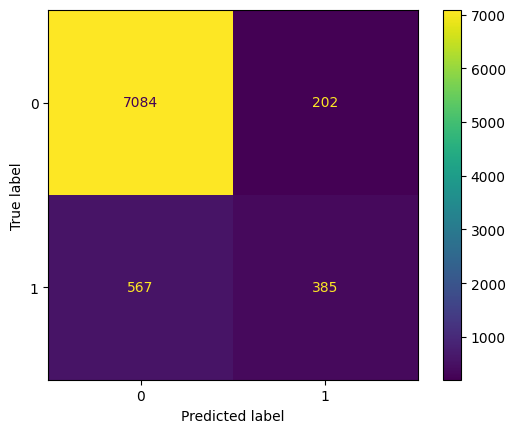

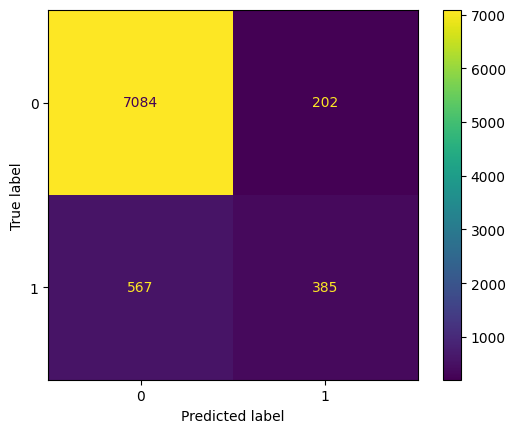

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred).plot()

#### b. Naive Bayes:

Gaussian Naive Bayes:

In [4]:
from sklearn.naive_bayes import GaussianNB

gaussianNB = GaussianNB(priors=None).fit(X_train, y_train)

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

y_pred = gaussianNB.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, pos_label=0)}')
print(f'Recall: {recall_score(y_test, y_pred, pos_label=0)}')
print(f'F1-score: {f1_score(y_test, y_pred, pos_label=0)}')

Accuracy: 0.8430444282592863
Precision: 0.9382374362709396
Recall: 0.8811217510259918
F1-score: 0.9087830687830688


### VD B.6:

In [5]:
import pandas as pd

data = pd.read_csv('framingham.csv')
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
data.dropna(how='any', axis=0, inplace=True)
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Train test split:

In [43]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, train_size=0.7, random_state=42, shuffle=True, stratify=data.TenYearCHD)
X_train, y_train = train_set.iloc[:, :-1], train_set.iloc[:, -1]
X_test, y_test = test_set.iloc[:, :-1], test_set.iloc[:, -1]

Training logistic regression:

In [44]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

y_pred = log_reg.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy: 0.8587055606198724
Precision: 0.7727272727272727
Recall: 0.10179640718562874


- Hiệu suất mô hình rất thấp (recall)

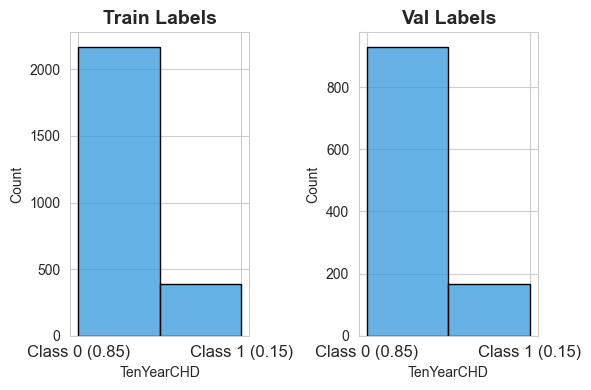

In [46]:
# label statistics
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

values, train_freq = np.unique(y_train, return_counts=True)
values, test_freq = np.unique(y_test, return_counts=True)
train_label_weights = train_freq / np.sum(train_freq)
test_label_weights = test_freq / np.sum(test_freq)

plt.figure(figsize=(6, 4))
plt.subplot(1,2,1)
sns.histplot(y_train, bins=2, kde=False, color="#3498db", edgecolor="black")
plt.xticks([0, 1], labels=[f"Class 0 ({round(train_label_weights[0], 2)})", f"Class 1 ({round(train_label_weights[1], 2)})"], fontsize=12)
plt.title("Train Labels", fontsize=14, fontweight="bold")

plt.subplot(1,2,2)
sns.histplot(y_test, bins=2, kde=False, color="#3498db", edgecolor="black")
plt.xticks([0, 1], labels=[f"Class 0 ({round(test_label_weights[0], 2)})", f"Class 1 ({round(test_label_weights[1], 2)})"], fontsize=12)
plt.title("Val Labels", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

- Dữ liệu bị mất cân bằng nhãn

In [55]:
# train lại mô hình với trọng số của nhãn khác
from sklearn.linear_model import LogisticRegression

log_reg_new = LogisticRegression(fit_intercept=True, max_iter=10000, class_weight='balanced', verbose=1)
log_reg_new.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, verbose=1)

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = log_reg_new.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precisoin: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy: 0.7019143117593437
Precisoin: 0.2948717948717949
Recall: 0.688622754491018


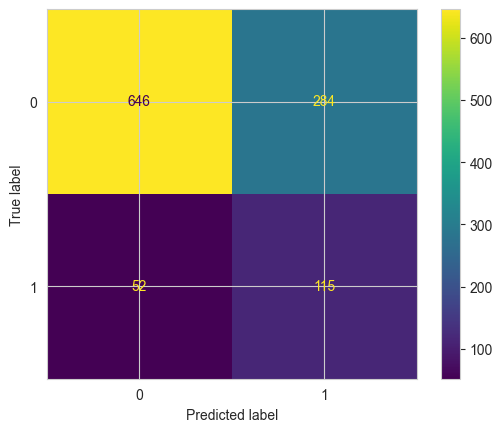

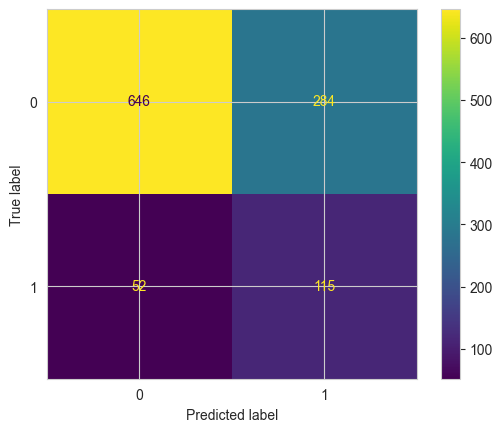

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred).plot()